In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
import warnings
import seaborn as sns


warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('display.max_rows', None)

In [2]:
data=pd.read_csv('C:/Users/ale_l/OneDrive/Documentos/Alejandro/1- Proyecto Ternium/1- Bending/bending_original.csv', sep=';', encoding='unicode_escape', low_memory=False)
data.insert(130, 'delta_bending', (data['PresetBending']-data['BENDING']))

In [3]:
features = data[['PROM_ESPESOR','KMS. APOYO', 'KMS. TRABAJO','Ancho','Bending jaula 4','COD DEFECTO','PresetBending','BENDING', 'Grado_1','delta_bending','MAX CUNIA', 'MAX CORONA', 'Tipo Acero','Relu', 'FUESE', 'MOD TERMICO']]

for x in features.columns:
    vacio=features.loc[:,x].dropna().empty
    if vacio==True:
        features=features.drop(columns=[x])

features=features.drop('COD DEFECTO', axis = 'columns')

for x in features.columns:
# Construimos el modelo
      imputer = KNNImputer(n_neighbors=2, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
      imputer.fit(features[[x]])
      features[x] = imputer.transform(features[[x]]).ravel()
'''''''Filtros'''''''

'''Estado de bobinas'''

# indexOk = features[features['COD DEFECTO'] != 'OK'].index
# features.drop(indexOk, inplace=True)

'''Fluencia'''

# indexTipo = features[features['Grado_1']!=7910].index
# features.drop(indexTipo, inplace=True)

'''Ancho'''

#indexEspesor1 = features[features['Ancho']<1500].index
#features.drop(indexEspesor1, inplace=True)

#indexEspesor2 = features[features['Ancho']>1600].index
#features.drop(indexEspesor2, inplace=True)

'''Espesor'''

#indexEspesor2 = features[features['PROM_ESPESOR']>1.4].index
#features.drop(indexEspesor2, inplace=True)

#indexEspesor2 = features[features['PROM_ESPESOR']>1.8].index
#features.drop(indexEspesor2, inplace=True)

'''Fuerza'''

# indexFuerza = features[features['FUESE']<110].index
# features.drop(indexFuerza, inplace=True)

# indexFuerza = features[features['FUESE']>150].index
# features.drop(indexFuerza, inplace=True)

'''KMS. APOYO'''

#indexApoyo = features[features['KMS. APOYO']<0].index
#features.drop(indexApoyo, inplace=True)

#indexApoyo = features[features['KMS. APOYO']>5000].index
#features.drop(indexApoyo, inplace=True)

'''BENDING'''

# indexBENDING = features[features['BENDING']<-15].index
# features.drop(indexBENDING, inplace=True)

# indexBENDING = features[features['BENDING']>1500].index
# features.drop(indexBENDING, inplace=True)


features.shape

'''Grafico'''

# grouped_data = features.groupby('KMS. APOYO')
# Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
# Bending_by_tipo.plot(kind='bar', rot=90, figsize=(70,6))
# plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

'Grafico'

In [4]:
features.insert(15, 'Area transversal', (features['Ancho']*features['PROM_ESPESOR']))

In [5]:
features.insert(16, 'new feature', (features['Grado_1']/features['Area transversal']))

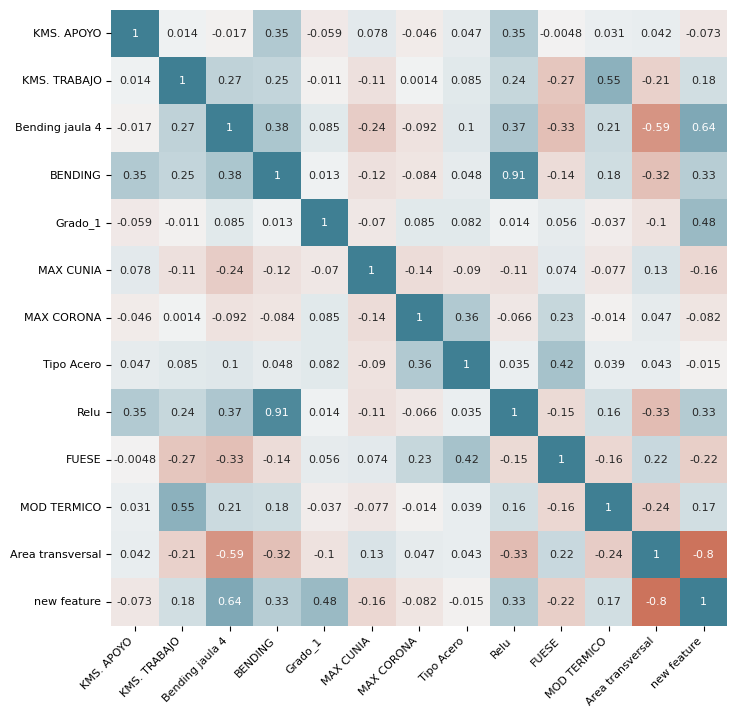

In [6]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

matrix = features.drop('delta_bending', axis = 'columns')
matrix = matrix.drop('PresetBending', axis = 'columns')
matrix = matrix.drop('PROM_ESPESOR', axis = 'columns')
matrix = matrix.drop('Ancho', axis = 'columns')


corr_matrix = matrix.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [7]:
features.head()

,PROM_ESPESOR,KMS. APOYO,KMS. TRABAJO,Ancho,Bending jaula 4,PresetBending,BENDING,Grado_1,delta_bending,MAX CUNIA,MAX CORONA,Tipo Acero,Relu,FUESE,MOD TERMICO,Area transversal,new feature
0,1.271,2093.0,56.0,1337.0,10.375388,-45.0,-33.0,7026.0,-12.0,6.583834,46.671249,183.0,-34.0,278.813,37.250391,1699.327,4.134578
1,0.853,2094.0,57.0,940.0,36.676172,-29.0,-32.0,7910.0,3.0,-16.999512,45.911953,214.0,-20.0,162.405,39.682196,801.820,9.865057
2,0.853,2096.0,59.0,940.0,39.321602,-29.0,-31.0,7910.0,2.0,-17.133320,52.243961,214.0,-32.0,146.081,42.213014,801.820,9.865057
3,0.852,2099.0,62.0,940.0,39.934894,-29.0,-29.0,7910.0,0.0,-16.458088,55.639999,214.0,-31.0,146.449,39.219000,800.880,9.876636
4,1.516,2101.0,0.0,1548.0,-17.893611,-54.0,-60.0,7026.0,6.0,34.056580,63.243832,183.0,-54.0,246.991,20.000000,2346.768,2.993905


Text(0, 0.5, 'Bending Promedio')

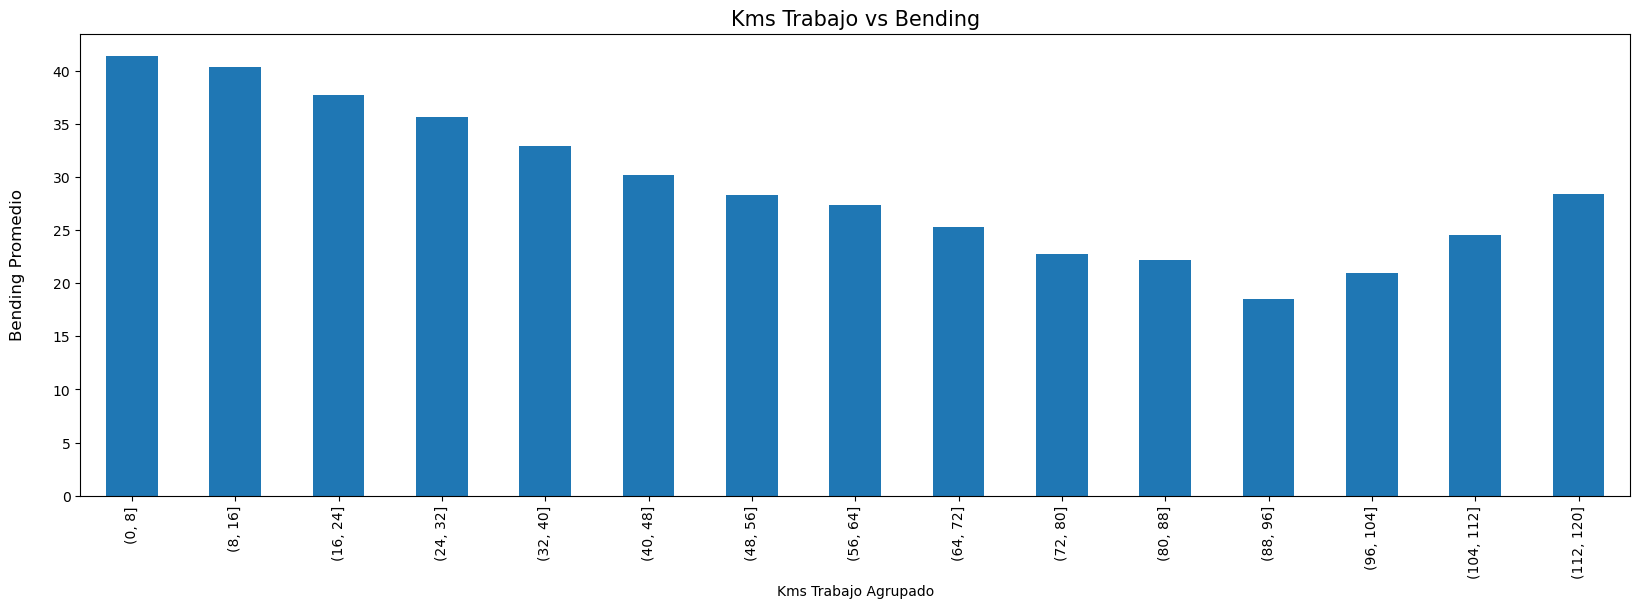

In [8]:
intervalo=pd.interval_range(start=0,end=120, periods=15)
nuevo2 = pd.cut(features['KMS. TRABAJO'], intervalo)

features['Kms Trabajo Agrupado'] = nuevo2

grouped_data = features.groupby('Kms Trabajo Agrupado')
Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
Bending_by_tipo.plot(kind='bar', rot=90, figsize=(20,6))

plt.title('Kms Trabajo vs Bending', size=15)
plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

Text(0, 0.5, 'Bending Promedio')

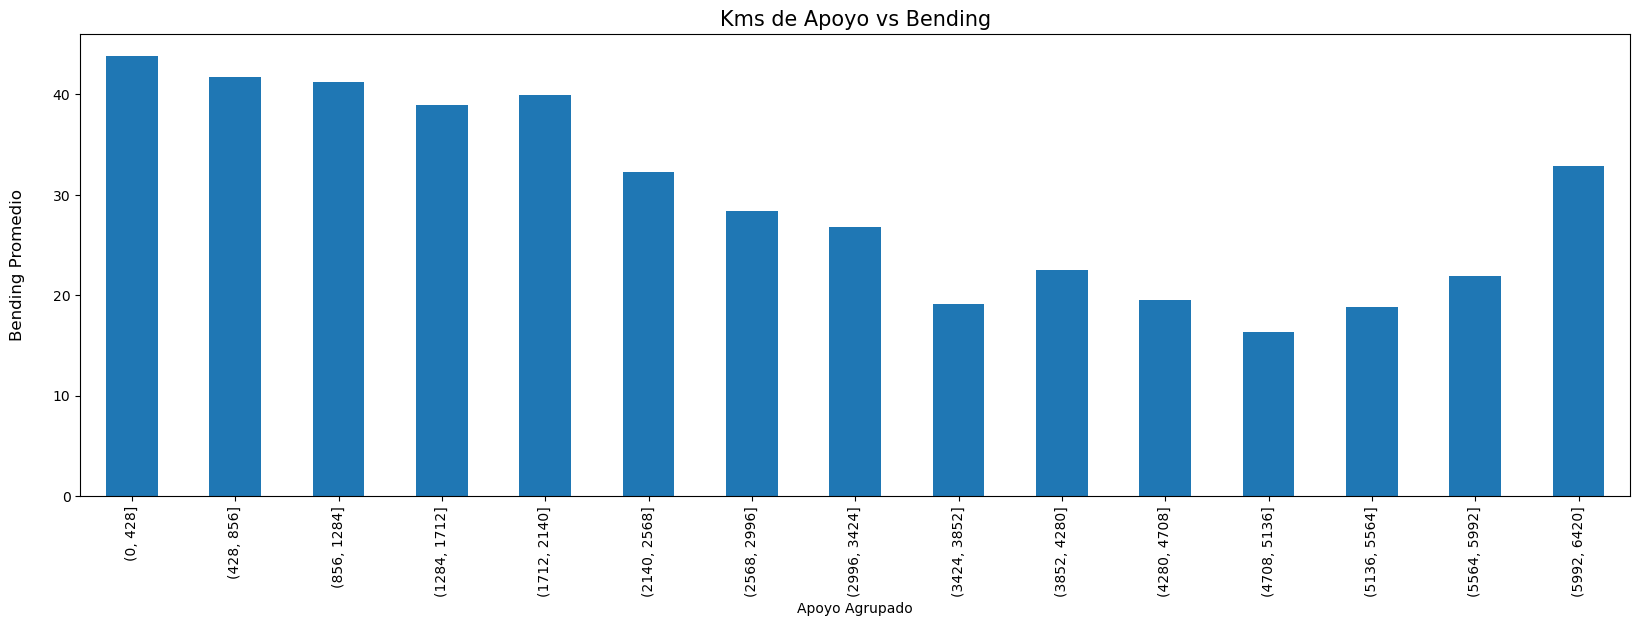

In [9]:
intervalo=pd.interval_range(start=0,end=6420, periods=15)
nuevo2 = pd.cut(features['KMS. APOYO'], intervalo)

features['Apoyo Agrupado'] = nuevo2

grouped_data = features.groupby('Apoyo Agrupado')
Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
Bending_by_tipo.plot(kind='bar', rot=90, figsize=(20,6))

plt.title('Kms de Apoyo vs Bending', size=15)
plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

Text(0, 0.5, 'Bending Promedio')

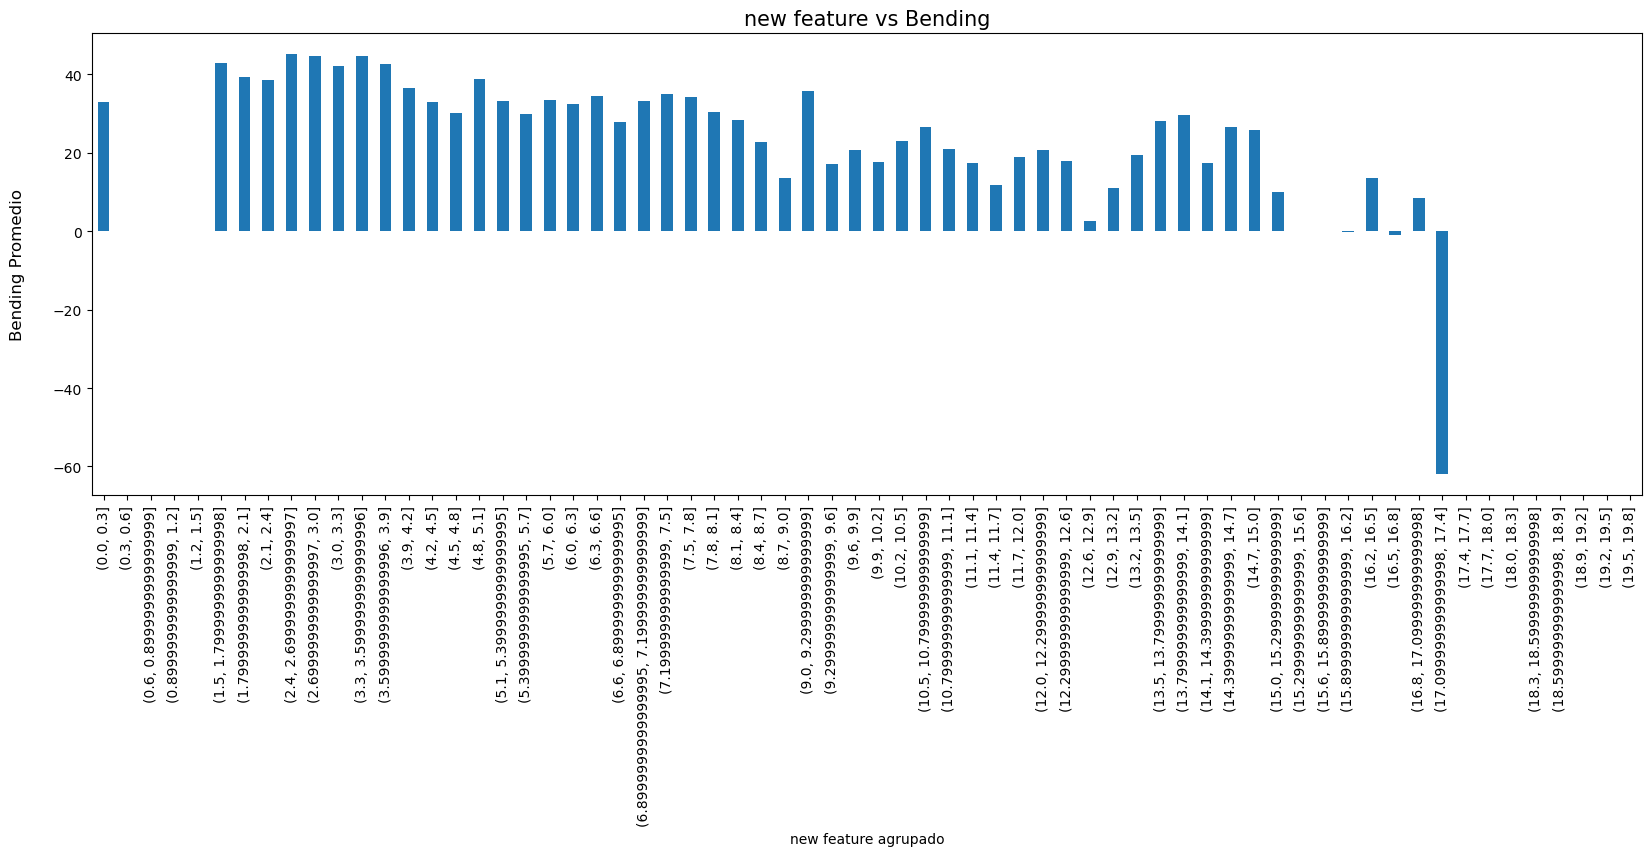

In [10]:
intervalo=pd.interval_range(start=0,end=20, freq=0.3)
nuevo2 = pd.cut(features['new feature'], intervalo)

features['new feature agrupado'] = nuevo2

grouped_data = features.groupby('new feature agrupado')
Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
Bending_by_tipo.plot(kind='bar', rot=90, figsize=(20,6))

plt.title('new feature vs Bending', size=15)
plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

#### Nueva variable de Estado de linea

In [16]:
features.head()

,PROM_ESPESOR,KMS. APOYO,KMS. TRABAJO,Ancho,Bending jaula 4,PresetBending,BENDING,Grado_1,delta_bending,MAX CUNIA,MAX CORONA,Tipo Acero,Relu,FUESE,MOD TERMICO,Area transversal,new feature,Kms Trabajo Agrupado,Apoyo Agrupado,new feature agrupado
0,1.271,2093.0,56.0,1337.0,10.375388,-45.0,-33.0,7026.0,-12.0,6.583834,46.671249,183.0,-34.0,278.813,37.250391,1699.327,4.134578,"(48.0, 56.0]","(1712, 2140]","(3.9, 4.2]"
1,0.853,2094.0,57.0,940.0,36.676172,-29.0,-32.0,7910.0,3.0,-16.999512,45.911953,214.0,-20.0,162.405,39.682196,801.820,9.865057,"(56.0, 64.0]","(1712, 2140]","(9.6, 9.9]"
2,0.853,2096.0,59.0,940.0,39.321602,-29.0,-31.0,7910.0,2.0,-17.133320,52.243961,214.0,-32.0,146.081,42.213014,801.820,9.865057,"(56.0, 64.0]","(1712, 2140]","(9.6, 9.9]"
3,0.852,2099.0,62.0,940.0,39.934894,-29.0,-29.0,7910.0,0.0,-16.458088,55.639999,214.0,-31.0,146.449,39.219000,800.880,9.876636,"(56.0, 64.0]","(1712, 2140]","(9.6, 9.9]"
4,1.516,2101.0,0.0,1548.0,-17.893611,-54.0,-60.0,7026.0,6.0,34.056580,63.243832,183.0,-54.0,246.991,20.000000,2346.768,2.993905,NaN,"(1712, 2140]","(2.6999999999999997, 3.0]"


In [12]:
features['Kms Trabajo Agrupado'].value_counts()

(8, 16]       3960
(0, 8]        3930
(16, 24]      3761
(24, 32]      3498
(32, 40]      3263
(40, 48]      2931
(48, 56]      2573
(56, 64]      2034
(64, 72]      1488
(72, 80]      1090
(80, 88]       732
(88, 96]       486
(96, 104]      262
(104, 112]     187
(112, 120]      96
Name: Kms Trabajo Agrupado, dtype: int64

In [13]:
features['Apoyo Agrupado'].value_counts()

(428, 856]      3626
(856, 1284]     3431
(0, 428]        3409
(1284, 1712]    3095
(1712, 2140]    3042
(2140, 2568]    2505
(2568, 2996]    2339
(3424, 3852]    1684
(2996, 3424]    1648
(3852, 4280]    1256
(5564, 5992]    1125
(5136, 5564]    1119
(4708, 5136]    1110
(4280, 4708]    1018
(5992, 6420]     295
Name: Apoyo Agrupado, dtype: int64